In [115]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [116]:
df = pd.read_csv("car_price.csv")


In [117]:
df.head()

,index,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [118]:
df.shape


(5512, 10)

In [119]:
# Check Missing Values 
# Check Duplicates
# Check Data Type
# Check the number of unique values of each column
# Check statistics of the dataset 
# Check various categories present in the different categorical columns

In [120]:
# Check Missing Values
df.isnull().sum()

index                  0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

In [121]:
# Check the Duplications
df.duplicated().sum()

np.int64(0)

In [122]:
# Check the datatype
df.dtypes

index                   int64
car_name               object
car_prices_in_rupee    object
kms_driven             object
fuel_type              object
transmission           object
ownership              object
manufacture             int64
engine                 object
Seats                  object
dtype: object

In [123]:
# Check the number of unique values of each column
df.nunique()

index                  5512
car_name               1896
car_prices_in_rupee    1300
kms_driven             2610
fuel_type                 5
transmission              2
ownership                 6
manufacture              26
engine                  139
Seats                     6
dtype: int64

In [124]:
# Check statistics of data set
df.describe()

,index,manufacture
count,5512.000000,5512.000000
mean,2755.500000,2015.455552
std,1591.321673,3.927974
min,0.000000,1995.000000
25%,1377.750000,2013.000000
50%,2755.500000,2016.000000
75%,4133.250000,2018.000000
max,5511.000000,2022.000000


In [125]:
# Car Variety:
    # > Dataset Covers 205 cars models
    # > Sizes, Weights , and engine capacity may vary 

# Price Range:
    # > Minimum prices: 5,118 dollars
    # > Maximum prices: 45,400 dollars
    # > Average prices: 13,276 dollars
# Engine Diversity:
    # > Engine differ in bore diameter and stroke lenght
    # > Risk ratings vary form -2 to 3

In [126]:
categorical_columns = ['fuel_type','transmission','ownership']

for col in categorical_columns:
    
    print(f"Category in {col} is : {df[col].unique()}")


Category in fuel_type is : ['Diesel' 'Petrol' 'Cng' 'Electric' 'Lpg']
Category in transmission is : ['Manual' 'Automatic']
Category in ownership is : ['1st Owner' '2nd Owner' '3rd Owner' '4th Owner' '5th Owner' '0th Owner']


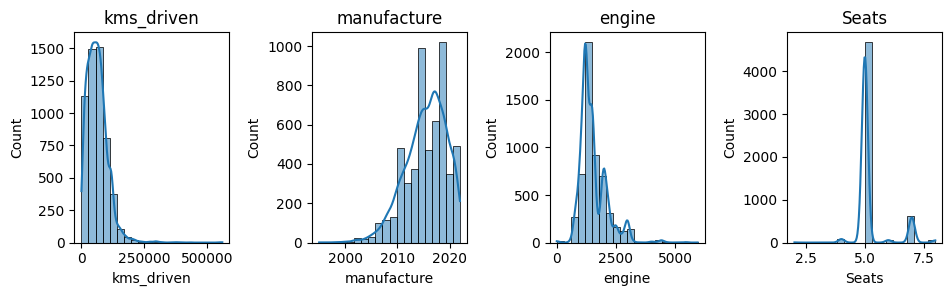

In [127]:
# إزالة النصوص وتحويل القيم إلى أرقام في عمود kms_driven
df['kms_driven'] = df['kms_driven'].str.replace(' kms', '').str.replace(',', '').astype(float)

# إزالة النصوص وتحويل القيم إلى أرقام في عمود engine
df['engine'] = df['engine'].str.replace(' cc', '').astype(float)

# إزالة النصوص وتحويل القيم إلى أرقام في عمود Seats
df['Seats'] = df['Seats'].str.replace(' Seats', '').astype(float)



numerical_features = ['kms_driven', 'manufacture', 'engine', 'Seats']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()


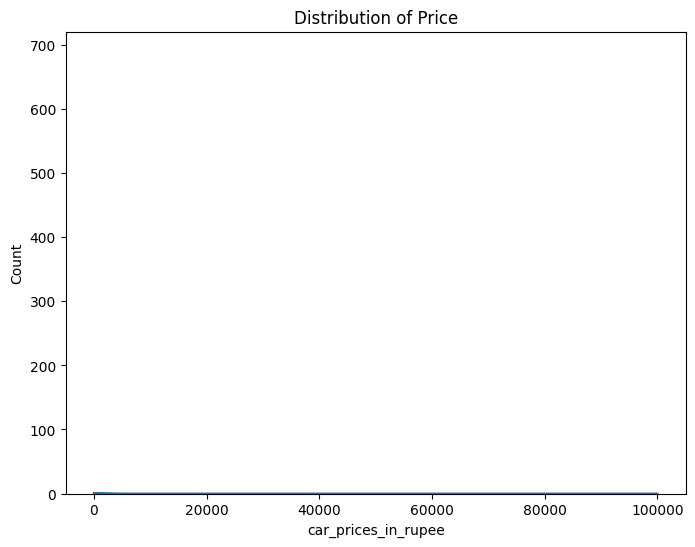

In [128]:
# وظيفة لتحويل القيم
def convert_price(price):
       # إزالة الفواصل
    price = price.replace(',', '')
    if 'Lakh' in price:
        return float(price.replace(' Lakh', ''))
    elif 'Crore' in price:
        return float(price.replace(' Crore', '')) * 100  # لتحويل Crore إلى Lakh
    return price
    
# توحيد الوحدات يضمن أن جميع القيم في نفس المقياس، مما يسهل التحليل والمقارنات.
# استخدام القيم الرقمية النقية يتيح للنماذج الرياضية التعامل مع البيانات بشكل صحيح دون أخطاء.
# القيم الرقمية التي تحتوي على فواصل لا يمكن تحليلها بشكل صحيح كأرقام في معظم المكتبات البرمجية.

# تطبيق التحويل على العمود
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].apply(convert_price)

# Price Analysis
plt.figure(figsize=(8, 6))
sns.histplot(data=df['car_prices_in_rupee'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()

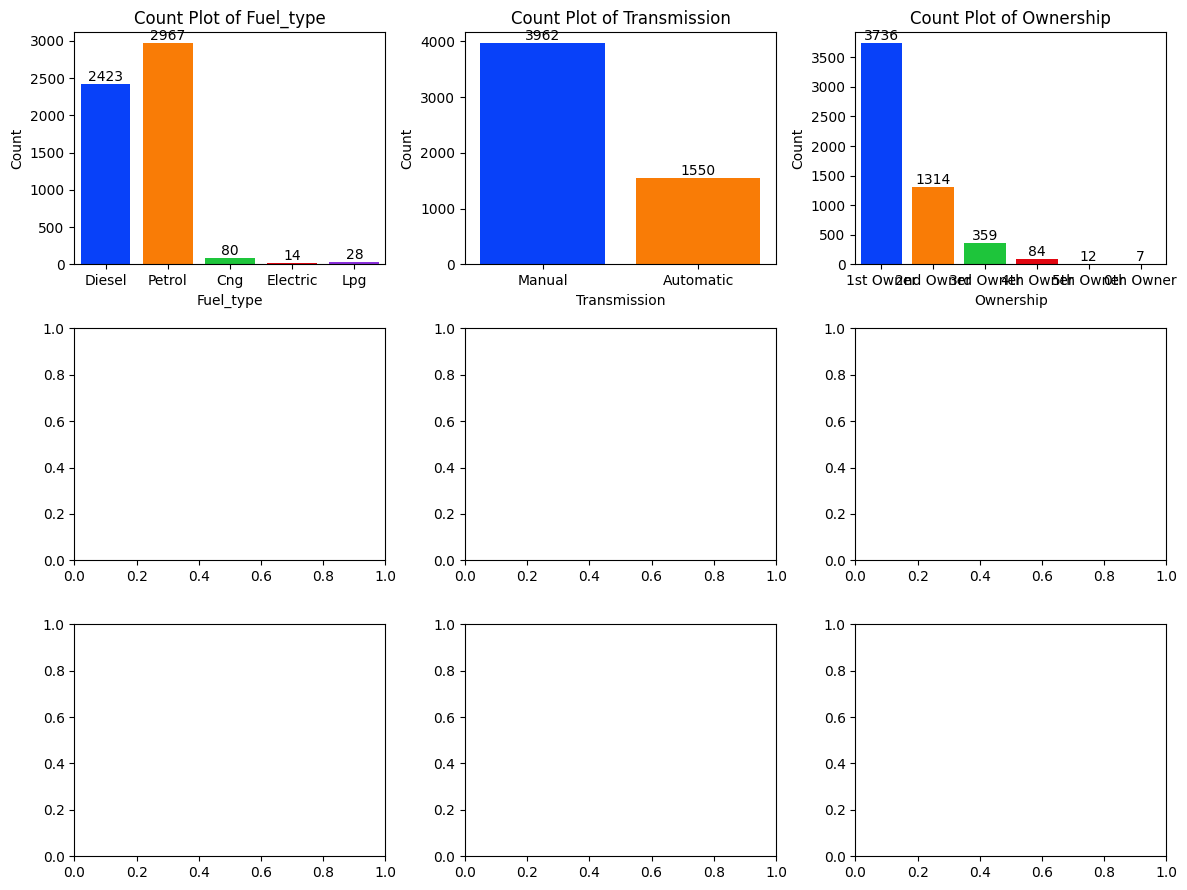

In [129]:
categorical_columns = ['fuel_type','transmission','ownership']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Adjust layout and show plots
plt.tight_layout()
plt.show()


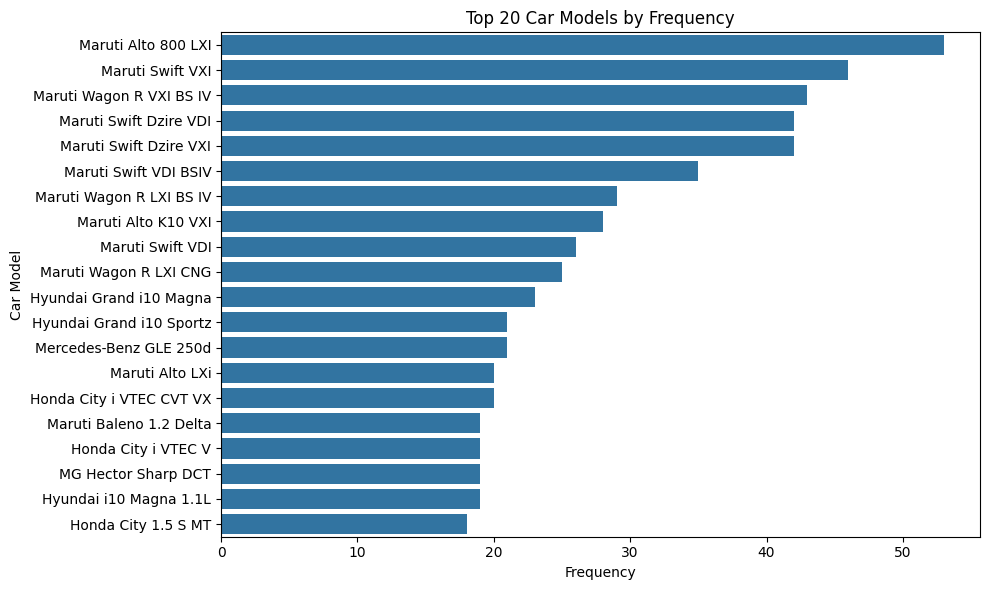

In [131]:
n = 20  # Number of top car models to plot
top_car_models = df['car_name'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()